In [1]:
from func import *
from importlib import reload
from scipy import stats
import json

In [2]:
import func

In [3]:
print(func.headers)

{'x-token': 'ci5hLmt1ZHJpbkBnbWFpbC5jb21Nb24gQXVnIDI4IDE2OjA5OjI0IENFU1QgMjAxNzdiZDI2ZjNkLTg4MjktNGIzNS04Y2UwLTM1MDEwOGJhYzRlZg=='}


In [79]:
func = reload(func)

## Load random and nonrandom samples

In [47]:
table = pd.read_hdf("./id_table.hdf")
table["direct"] = pd.read_hdf("./direct_short_real.hdf")

In [ ]:
random_counters = get_counters(10, protocol="semanticType")

In [ ]:
random_counter = list()
for counter_list in random_counters:
    random_counter = random_counter + counter_list 

In [80]:
real_counter = func.get_sem_cat_counter_list(table, "real", protocol="semanticType")

102688 ['122609', '161896', '30784', '53678', '64924', '65672', '100160', '102688', '178764', '179403', '191562', '204439', '246832', '251040', '318406', '343401', '399815', '460551', '481632', '520730', '528639', '529606']
102688 ['122609', '161896', '30784', '53678', '64924', '65672', '100160', '102688', '178764', '179403', '191562', '204439', '246832', '251040', '318406', '343401', '399815', '460551', '481632', '520730', '528639', '529606']
179403 ['122609', '161896', '30784', '53678', '64924', '65672', '100160', '102688', '178764', '179403', '191562', '204439', '246832', '251040', '318406', '343401', '399815', '460551', '481632', '520730', '528639', '529606']
460551 ['122609', '161896', '30784', '53678', '64924', '65672', '100160', '102688', '178764', '179403', '191562', '204439', '246832', '251040', '318406', '343401', '399815', '460551', '481632', '520730', '528639', '529606']
460551 ['122609', '161896', '30784', '53678', '64924', '65672', '100160', '102688', '178764', '179403', 

2078845 ['284146', '694287', '136417', '468913', '605818', '708522', '851381', '864414', '2008465', '2008698', '2009237', '2009672', '2068422', '2078845', '2130372', '2373733', '2374221', '2493703', '2494692', '2496814', '2498854', '2501474']
605818 ['284146', '694287', '136417', '468913', '605818', '708522', '851381', '864414', '2008465', '2008698', '2009237', '2009672', '2068422', '2078845', '2130372', '2373733', '2374221', '2493703', '2494692', '2496814', '2498854', '2501474']
605818 ['284146', '694287', '136417', '468913', '605818', '708522', '851381', '864414', '2008465', '2008698', '2009237', '2009672', '2068422', '2078845', '2130372', '2373733', '2374221', '2493703', '2494692', '2496814', '2498854', '2501474']
605818 ['284146', '694287', '136417', '468913', '605818', '708522', '851381', '864414', '2008465', '2008698', '2009237', '2009672', '2068422', '2078845', '2130372', '2373733', '2374221', '2493703', '2494692', '2496814', '2498854', '2501474']
605818 ['284146', '694287', '13

342390 ['2688406', '46701', '46715', '63525', '81484', '81530', '170057', '177356', '194553', '198080', '219512', '228404', '238302', '244490', '291693', '308922', '342390', '400315', '518364', '522554', '537739']
342390 ['2688406', '46701', '46715', '63525', '81484', '81530', '170057', '177356', '194553', '198080', '219512', '228404', '238302', '244490', '291693', '308922', '342390', '400315', '518364', '522554', '537739']
537739 ['2688406', '46701', '46715', '63525', '81484', '81530', '170057', '177356', '194553', '198080', '219512', '228404', '238302', '244490', '291693', '308922', '342390', '400315', '518364', '522554', '537739']
537739 ['2688406', '46701', '46715', '63525', '81484', '81530', '170057', '177356', '194553', '198080', '219512', '228404', '238302', '244490', '291693', '308922', '342390', '400315', '518364', '522554', '537739']
194553 ['320146', '2130016', '46701', '46715', '63525', '81484', '81530', '170057', '177356', '194553', '198080', '219512', '228404', '238302', 

729887 ['844442', '1161513', '96336', '172380', '186760', '228170', '386538', '413174', '454570', '550678', '620484', '635692', '658757', '675096', '729887', '746770', '757999', '817070', '831180', '841951', '1040478', '1131028']
729887 ['844442', '1161513', '96336', '172380', '186760', '228170', '386538', '413174', '454570', '550678', '620484', '635692', '658757', '675096', '729887', '746770', '757999', '817070', '831180', '841951', '1040478', '1131028']
729887 ['844442', '1161513', '96336', '172380', '186760', '228170', '386538', '413174', '454570', '550678', '620484', '635692', '658757', '675096', '729887', '746770', '757999', '817070', '831180', '841951', '1040478', '1131028']
729887 ['844442', '1161513', '96336', '172380', '186760', '228170', '386538', '413174', '454570', '550678', '620484', '635692', '658757', '675096', '729887', '746770', '757999', '817070', '831180', '841951', '1040478', '1131028']
729887 ['844442', '1161513', '96336', '172380', '186760', '228170', '386538', '4

228170 ['2577113', '5808488', '96336', '172380', '186760', '228170', '386538', '413174', '454570', '550678', '620484', '635692', '658757', '675096', '729887', '746770', '757999', '817070', '831180', '841951', '1040478', '1131028']
228170 ['2577113', '5808488', '96336', '172380', '186760', '228170', '386538', '413174', '454570', '550678', '620484', '635692', '658757', '675096', '729887', '746770', '757999', '817070', '831180', '841951', '1040478', '1131028']
1040478 ['977172', '5710692', '96336', '172380', '186760', '228170', '386538', '413174', '454570', '550678', '620484', '635692', '658757', '675096', '729887', '746770', '757999', '817070', '831180', '841951', '1040478', '1131028']
1040478 ['977172', '5710692', '96336', '172380', '186760', '228170', '386538', '413174', '454570', '550678', '620484', '635692', '658757', '675096', '729887', '746770', '757999', '817070', '831180', '841951', '1040478', '1131028']
1040478 ['977172', '5710692', '96336', '172380', '186760', '228170', '386538

2275539 ['977172', '5710692', '186760', '729887', '841951', '2275539', '2928474', '3231087', '3275855', '3275991', '3276003', '3276728', '3968286', '4620793', '4636629', '4644147', '4666734']
2275539 ['977172', '5710692', '186760', '729887', '841951', '2275539', '2928474', '3231087', '3275855', '3275991', '3276003', '3276728', '3968286', '4620793', '4636629', '4644147', '4666734']
2275539 ['977172', '5710692', '186760', '729887', '841951', '2275539', '2928474', '3231087', '3275855', '3275991', '3276003', '3276728', '3968286', '4620793', '4636629', '4644147', '4666734']
2275539 ['977172', '5710692', '186760', '729887', '841951', '2275539', '2928474', '3231087', '3275855', '3275991', '3276003', '3276728', '3968286', '4620793', '4636629', '4644147', '4666734']
729887 ['977172', '5710692', '186760', '729887', '841951', '2275539', '2928474', '3231087', '3275855', '3275991', '3276003', '3276728', '3968286', '4620793', '4636629', '4644147', '4666734']
729887 ['977172', '5710692', '186760', '7

297449 ['222273', '297449', '1153852', '3737928', '354148', '561320', '567428', '672826', '701329', '775851', '786752', '796946', '830384', '925673', '1253322', '1272728', '1328961', '1537052', '1537102', '1537167', '1537792', '1615771', '1624566', '1669179']
796946 ['222273', '297449', '1153852', '3737928', '354148', '561320', '567428', '672826', '701329', '775851', '786752', '796946', '830384', '925673', '1253322', '1272728', '1328961', '1537052', '1537102', '1537167', '1537792', '1615771', '1624566', '1669179']
796946 ['222273', '297449', '1153852', '3737928', '354148', '561320', '567428', '672826', '701329', '775851', '786752', '796946', '830384', '925673', '1253322', '1272728', '1328961', '1537052', '1537102', '1537167', '1537792', '1615771', '1624566', '1669179']
796946 ['222273', '297449', '1153852', '3737928', '354148', '561320', '567428', '672826', '701329', '775851', '786752', '796946', '830384', '925673', '1253322', '1272728', '1328961', '1537052', '1537102', '1537167', '153

743028 ['1173815', '2212364', '619475', '743028', '1024338', '2963093', '3737113', '3967202', '3967919', '4058297', '4058365']
1024338 ['1173815', '2212364', '619475', '743028', '1024338', '2963093', '3737113', '3967202', '3967919', '4058297', '4058365']
743028 ['1173815', '2212364', '619475', '743028', '1024338', '2963093', '3737113', '3967202', '3967919', '4058297', '4058365']
743028 ['1173815', '2212364', '619475', '743028', '1024338', '2963093', '3737113', '3967202', '3967919', '4058297', '4058365']
743028 ['1173815', '2212364', '619475', '743028', '1024338', '2963093', '3737113', '3967202', '3967919', '4058297', '4058365']
743028 ['1173815', '2212364', '619475', '743028', '1024338', '2963093', '3737113', '3967202', '3967919', '4058297', '4058365']
1024338 ['856304', '3673704', '619475', '743028', '1024338', '2963093', '3737113', '3967202', '3967919', '4058297', '4058365']
743028 ['856304', '3673704', '619475', '743028', '1024338', '2963093', '3737113', '3967202', '3967919', '40582

1308027 ['1308027', '5537206', '47860', '355140', '1653880', '1654224', '2623665', '2698198', '2700042', '2701009', '2794871', '2881069', '3002726', '3214042', '3276170', '3284133', '3305152', '3305449', '3399674', '3675256', '3737516', '4618894']
2623665 ['1308027', '5537206', '47860', '355140', '1653880', '1654224', '2623665', '2698198', '2700042', '2701009', '2794871', '2881069', '3002726', '3214042', '3276170', '3284133', '3305152', '3305449', '3399674', '3675256', '3737516', '4618894']
355140 ['1308027', '5537206', '47860', '355140', '1653880', '1654224', '2623665', '2698198', '2700042', '2701009', '2794871', '2881069', '3002726', '3214042', '3276170', '3284133', '3305152', '3305449', '3399674', '3675256', '3737516', '4618894']
47860 ['1308027', '5537206', '47860', '355140', '1653880', '1654224', '2623665', '2698198', '2700042', '2701009', '2794871', '2881069', '3002726', '3214042', '3276170', '3284133', '3305152', '3305449', '3399674', '3675256', '3737516', '4618894']
2623665 ['1

192835 ['653293', '715230', '738925', '2263787', '8886', '45778', '113038', '162489', '192835', '353273', '380451', '437388', '444639', '467336', '468901', '477185', '477402', '477476', '478295', '478978', '479308', '479807', '480485', '480592']
192835 ['653293', '715230', '738925', '2263787', '8886', '45778', '113038', '162489', '192835', '353273', '380451', '437388', '444639', '467336', '468901', '477185', '477402', '477476', '478295', '478978', '479308', '479807', '480485', '480592']
192835 ['653293', '715230', '738925', '2263787', '8886', '45778', '113038', '162489', '192835', '353273', '380451', '437388', '444639', '467336', '468901', '477185', '477402', '477476', '478295', '478978', '479308', '479807', '480485', '480592']
192835 ['653293', '715230', '738925', '2263787', '8886', '45778', '113038', '162489', '192835', '353273', '380451', '437388', '444639', '467336', '468901', '477185', '477402', '477476', '478295', '478978', '479308', '479807', '480485', '480592']
192835 ['381864'

169048 ['33236', '1259998', '2623697', '8218', '9271', '9387', '25670', '26519', '45171', '49693', '51751', '57936', '59278', '85809', '86054', '119716', '122398', '129835', '131891', '141727', '165655', '166415', '169048']
86054 ['33236', '1259998', '2623697', '8218', '9271', '9387', '25670', '26519', '45171', '49693', '51751', '57936', '59278', '85809', '86054', '119716', '122398', '129835', '131891', '141727', '165655', '166415', '169048']
86054 ['33236', '1259998', '2623697', '8218', '9271', '9387', '25670', '26519', '45171', '49693', '51751', '57936', '59278', '85809', '86054', '119716', '122398', '129835', '131891', '141727', '165655', '166415', '169048']
49693 ['33236', '1259998', '2623697', '8218', '9271', '9387', '25670', '26519', '45171', '49693', '51751', '57936', '59278', '85809', '86054', '119716', '122398', '129835', '131891', '141727', '165655', '166415', '169048']
129835 ['33236', '1259998', '2623697', '8218', '9271', '9387', '25670', '26519', '45171', '49693', '51751',

427982 ['2577113', '5808488', '427982', '1223144', '3737072']
427982 ['2577113', '5808488', '427982', '1223144', '3737072']
3690997 ['2578037', '3690997', '5553027', '427982', '1223144', '3737072']
2578037 ['2578037', '3690997', '5553027', '427982', '1223144', '3737072']
427982 ['2578037', '3690997', '5553027', '427982', '1223144', '3737072']
427982 ['2578037', '3690997', '5553027', '427982', '1223144', '3737072']
427982 ['2578037', '3690997', '5553027', '427982', '1223144', '3737072']
427982 ['2578037', '3690997', '5553027', '427982', '1223144', '3737072']
712248 ['457935', '732723', '927181', '6941', '49356', '85355', '124270', '135283', '172915', '266324', '305779', '343248', '424556', '453754', '529975', '531551', '543299', '544764', '608125', '627539', '642994', '702821', '712248']
927181 ['457935', '732723', '927181', '6941', '49356', '85355', '124270', '135283', '172915', '266324', '305779', '343248', '424556', '453754', '529975', '531551', '543299', '544764', '608125', '627539'

426487 ['976440', '5553021', '34075', '194256', '223289', '253621', '288329', '313813', '321985', '322199', '356380', '363831', '425171', '426487', '461547', '463490', '506898', '515004', '536106', '559019', '583662', '614490']
515004 ['976440', '5553021', '34075', '194256', '223289', '253621', '288329', '313813', '321985', '322199', '356380', '363831', '425171', '426487', '461547', '463490', '506898', '515004', '536106', '559019', '583662', '614490']
515004 ['976440', '5553021', '34075', '194256', '223289', '253621', '288329', '313813', '321985', '322199', '356380', '363831', '425171', '426487', '461547', '463490', '506898', '515004', '536106', '559019', '583662', '614490']
515004 ['976440', '5553021', '34075', '194256', '223289', '253621', '288329', '313813', '321985', '322199', '356380', '363831', '425171', '426487', '461547', '463490', '506898', '515004', '536106', '559019', '583662', '614490']
515004 ['976440', '5553021', '34075', '194256', '223289', '253621', '288329', '313813', 

944645 ['3691726', '5851363', '36794', '89923', '274052', '297198', '636406', '772074', '925925', '944645', '1555126', '1623830', '2371265', '2371319', '2493885', '2496142', '2880622', '3103467', '3283541', '3399701', '3640423', '3680464']
944645 ['3691726', '5851363', '36794', '89923', '274052', '297198', '636406', '772074', '925925', '944645', '1555126', '1623830', '2371265', '2371319', '2493885', '2496142', '2880622', '3103467', '3283541', '3399701', '3640423', '3680464']
944645 ['3691726', '5851363', '36794', '89923', '274052', '297198', '636406', '772074', '925925', '944645', '1555126', '1623830', '2371265', '2371319', '2493885', '2496142', '2880622', '3103467', '3283541', '3399701', '3640423', '3680464']
944645 ['3691726', '5851363', '36794', '89923', '274052', '297198', '636406', '772074', '925925', '944645', '1555126', '1623830', '2371265', '2371319', '2493885', '2496142', '2880622', '3103467', '3283541', '3399701', '3640423', '3680464']
944645 ['3691726', '5851363', '36794', '

811482 ['1044854', '3812385', '5851377', '73817', '337095', '455826', '811482', '1238649', '1318828', '1593392', '1654131', '1654484', '1677256', '2009975', '2176440', '2251566', '2331934', '2374715', '2489694', '2491460', '2492239', '2499359', '2500171']
811482 ['1044854', '3812385', '5851377', '73817', '337095', '455826', '811482', '1238649', '1318828', '1593392', '1654131', '1654484', '1677256', '2009975', '2176440', '2251566', '2331934', '2374715', '2489694', '2491460', '2492239', '2499359', '2500171']
3812385 ['1044854', '3812385', '5851377', '73817', '337095', '455826', '811482', '1238649', '1318828', '1593392', '1654131', '1654484', '1677256', '2009975', '2176440', '2251566', '2331934', '2374715', '2489694', '2491460', '2492239', '2499359', '2500171']
3812385 ['1044854', '3812385', '5851377', '73817', '337095', '455826', '811482', '1238649', '1318828', '1593392', '1654131', '1654484', '1677256', '2009975', '2176440', '2251566', '2331934', '2374715', '2489694', '2491460', '249223

In [81]:
print(len(real_counter[0]), len(real_counter[1]))

341 62


In [ ]:
real_counter_old = func.get_sem_cat_counter_list(table, "real", protocol="semanticType")

In [ ]:
for counter1, counter2 in zip(real_counter, real_counter_old):
    print(counter1, counter2, sep="\n", end="\n\n\n")

In [ ]:
print(len(random_counter), len(real_counter))

## Kolmogorov-Smirnov test

In [ ]:
def test_if_the_same(random_counter, real_counter, cat):
    random_sample = [counter[cat] for counter in random_counter]
    real_sample = [counter[cat] for counter in real_counter]
    return stats.ks_2samp(random_sample, real_sample)

In [ ]:
cats = set()
for counter in real_counter + random_counter:
    cats = cats | set(counter.keys())

In [ ]:
print(cats)

In [ ]:
differences = [(cat, test_if_the_same(random_counter, real_counter, cat)) for cat in cats]

In [ ]:
for dif in differences:
    if dif[1].pvalue < 0.05:
        print(dif[0], "{0:.2E}".format(dif[1].pvalue))

In [ ]:
group_dataframe = pd.read_csv("./SemGroups_2013.txt", sep="|", header=None)

In [ ]:
del group_dataframe[2]

In [ ]:
group_dataframe

In [ ]:
dif_dataframe = pd.DataFrame()
dif_dataframe["Semantic type(subcategory)"] = pd.Series([dif[0] for dif in differences])
dif_dataframe["P-value"] = pd.Series([dif[1][1] for dif in differences])

In [ ]:
dif_dataframe

In [ ]:
new_one = pd.merge(dif_dataframe, group_dataframe, how="left", left_on="Semantic type(subcategory)", right_on=3)

In [ ]:
del new_one[3]

In [ ]:
new_one["Semantic category"] = new_one[1]
del(new_one[1])

In [ ]:
new_one = new_one.sort_values(by="P-value")

## Differentiate between directed and nondirected

In [4]:
id_table = pd.read_hdf("./id_table.hdf")

In [5]:
something = id_table.apply(find_direct_relations, axis=1)

DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
DOOOONE!
D

In [13]:
id_table["direct_relations"] = something

In [16]:
id_table["direct_relations"] = id_table.apply(func.mark_if_direct, axis=1)

In [21]:
print(sum([1 if bol else 0 for bol in id_table["direct_relations"]]))

341


In [ ]:
def modify_tables(table)

## Wordclouds for predicates

In [ ]:
pred_counter = func.get_sem_cat_counter_list(id_table, "real", protocol="predicates")

In [ ]:
pred_counter.most_common(10)

In [ ]:
from wordcloud import WordCloud

In [ ]:
wcloud = WordCloud(width=2000, height=1000, max_words=100)

In [ ]:
generated = wcloud.generate_from_frequencies(pred_counter)
neg_generated = wcloud.generate_from_frequencies(neg_pred_counter)

In [ ]:
import seaborn as sns

In [ ]:
sns.set_style(style="white")

In [ ]:
%matplotlib inline
plt.figure(figsize = (15, 8))
plt.imshow(generated)

In [ ]:
%matplotlib inline
plt.figure(figsize = (15, 8))
plt.imshow(neg_generated)

In [ ]:
wcloud.generate_from_frequencies?

In [ ]:
%matplotlib?

In [ ]:
neg_table = pd.read_hdf("./id_table_neg_0.hdf")

In [ ]:
neg_pred_counter = func.get_sem_cat_counter_list(neg_table, 0, protocol="predicates")

In [ ]:
neg_pred_counter.most_common(20)

In [ ]:
first_keys = set()
second_keys = set()
for key in list(neg_pred_counter.keys()) + list(pred_counter.keys()):
    first_key = key.split("--->")[0]
    second_key = key.split("--->")[1]
    first_keys.add(first_key)
    second_keys.add(second_key)

In [ ]:
print(first_keys)

In [ ]:
class normDict(defaultdict):
    
    def normalize(self):
        whole = 0
        for value in self.values():
            whole += value
        for key in self.keys():
            self[key] = self[key] / whole
        return

In [ ]:
from collections import Counter, defaultdict

def get_prob(counter):
    prob_dict = defaultdict(lambda: normDict(int)) 
    for first_key in first_keys: 
        for second_key in second_keys:
            for key in counter.keys():
                if "--->".join([first_key, second_key]) == key:
                    prob_dict[first_key][second_key] += 1
    for key in prob_dict.keys():
        prob_dict[key].normalize()
    return prob_dict

In [ ]:
prob_dict, neg_prob_dict = get_prob(pred_counter), get_prob(neg_pred_counter)

In [ ]:
for first in list(prob_dict.keys()) + list(neg_prob_dict.keys()):
    print(first, dict(prob_dict[first]), dict(neg_prob_dict[first]), sep="\n", end="\n\n\n")

## Get density, please

In [60]:
from statsmodels.nonparametric.kde import kdensity as kde

In [66]:
def plot_dens(cat, counter_list, color):
    get_track_key = partial_second(Counter.__getitem__, cat)
    track = list(map(get_track_key, counter_list))
    min_lim = 0
    max_lim = np.percentile(track, 95)
    plt.xlim(0, max_lim)
    pdf, grid, _ = kde(track, cut=0)
    plt.plot(grid, pdf, color=color)
    plt.xlabel("Normalized number of semantic category occurence between drug and disease")
    plt.ylabel("Drug-disease count")

In [56]:
print(len(real_counter))

2


In [62]:
print(real_counter[0][0].keys())

dict_keys(['Enzyme', 'Biologic Function', 'Carbohydrate', 'Organism Attribute', 'Group', 'Experimental Model of Disease', 'Neoplastic Process', 'Qualitative Concept', 'Pharmacologic Substance', 'Indicator, Reagent, or Diagnostic Aid', 'Disease or Syndrome', 'Biologically Active Substance', 'Population Group', 'Classification', 'Immunologic Factor', 'Lipid', 'Body Part, Organ, or Organ Component', 'Organic Chemical', 'Laboratory Procedure', 'Functional Concept', 'Cell or Molecular Dysfunction', 'Professional or Occupational Group', 'Human', 'Injury or Poisoning', 'Hazardous or Poisonous Substance', 'Clinical Attribute', 'Molecular Function', 'Mammal', 'Vitamin', 'Chemical Viewed Structurally', 'Occupational Activity', 'Organism Function', 'Element, Ion, or Isotope', 'Acquired Abnormality', 'Sign or Symptom', 'Antibiotic', 'Cell', 'Organism', 'Hormone', 'Medical Device', 'Nucleic Acid, Nucleoside, or Nucleotide', 'Gene or Genome', 'Receptor', 'Animal', 'Cell Function', 'Therapeutic or Pr

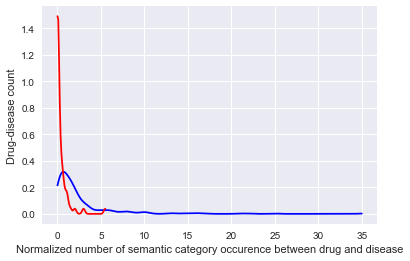

In [82]:
%matplotlib inline
plot_dens("Enzyme", real_counter[0], "blue")
plot_dens("Enzyme", real_counter[1], "red")